<h1>Fetching articles from pubmed</h1>

In [2]:
from pymed import PubMed

my_email = "norockderipa@yahoo.com"

# Create a PubMed object that GraphQL can use to query
# Note that the parameters are not required but kindly requested by PubMed Central
# https://www.ncbi.nlm.nih.gov/pmc/tools/developers/
pubmed = PubMed(tool="Protein Interaction Text Miner", email=my_email)


class Publication:
    def __init__(self, 
                 pubmed_id, 
                 title,
                 publication_date,
                 abstract,
                 keywords = ""):
        
        self.pubmed_id = pubmed_id
        self.url = "https://www.ncbi.nlm.nih.gov/pubmed/"+pubmed_id.split("\n")[0]
        self.title = title        
        self.publication_date = publication_date
        self.abstract = abstract
        if abstract is not None and abstract is not "":
            self.words = len(abstract.split(" "))  
        else:
            self.words = 0
        self.keywords = keywords
        
        

            
            
        

In [3]:
# Create a GraphQL query in plain text
#query = '(("2018/05/01"[Date - Create] : "3000"[Date - Create])) AND (Xiaoying Xian[Author] OR diabetes)'
query = "Dystrophin"


# Execute the query against the API
results = pubmed.query(query, max_results=500)



# Loop over the retrieved articles
publications = []
for article in results:
    if hasattr(article, 'keywords'):
        publications +=[Publication(article.pubmed_id,
                                    article.title,
                                    article.publication_date,
                                    article.abstract,
                                    article.keywords)]
    else:
        publications +=[Publication(article.pubmed_id,
                            article.title,
                            article.publication_date,
                            article.abstract)]

print("Extracted",len(publications),"articles")

Extracted 500 articles


In [4]:
publications = [publication for publication in publications if publication.words is not 0]
print(len(publications))

464


<h1>Studying the abstracts from the resulting query</h1>

count 464
mean 166.83620689655172
std 79.61141552669498


(array([ 51.,  32.,  58.,  87., 100.,  84.,  33.,  12.,   3.,   4.]),
 array([  8. ,  48.8,  89.6, 130.4, 171.2, 212. , 252.8, 293.6, 334.4,
        375.2, 416. ]),
 <a list of 10 Patch objects>)

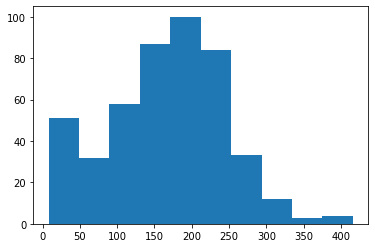

In [5]:
from matplotlib import pyplot as plt 
import numpy as np  

words = [publication.words for publication in publications]

print("count",len(words))

print("mean",np.mean(words))

print("std",np.std(words))

plt.hist(words)

<h1>A few functions to extract the proteins from an abstact</h1>

In [6]:
def stringSplitter(string, length):
    
    return list((string[0+i:length+i] for i in range(0, len(string), length)))

def PPI_Detection_Network(text):
    
    return round(random.random())


def PPI_Estimator(abstract):
    
    results = []
    
    for piece in stringSplitter(abstract, 50):
        results += [PPI_Detection_Network(piece)]
    
    return bool(round(sum(results)/len(results)))

def getPossiblePPP(publications):
    
    possibleInteractions = []
    
    for p in publications:
        if PPI_Estimator(p.abstract):
            possibleInteractions += [p]
        
    return possibleInteractions




In [7]:

words = []

words = publications[0].abstract.split()
frequency = [words.count(i) for i in words]

indexed = dict(zip(words, frequency))
for item,count in indexed.items():
    print(item,count)

Duchenne 1
Muscle 1
dystrophy 1
(DMD) 1
is 1
a 4
X-linked 1
inherited 1
disease 1
predominantly 1
caused 1
by 1
severe 1
mutations 3
in 5
DMD 2
gene 2
leading 1
to 3
absence 1
of 4
dystrophin 1
protein. 1
Here 1
we 1
report 1
14-year-old 1
Mongolian 1
boy 1
suffering 1
from 1
proximal 1
muscle 1
weakness, 1
pseudohypertrophic 1
deltoid 1
and 3
gastrocnemius 1
muscles 1
since 1
early 1
childhood. 1
Lactate 1
dehydrogenase 1
(LDH) 1
creatine 1
kinase 1
(CK) 1
levels 1
were 1
elevated. 1
Mutation 1
analysis 2
including 1
MLPA 1
sequencing 1
the 2
revealed 1
hemizygous 1
silent 5
variant, 1
c.1329C>T 1
(p.Ser443=) 1
exon 2
11. 1
This 1
mutation, 1
listed 1
SNP 1
database 2
(rs1060502631), 1
was 1
described 1
as 1
variant 1
unknown 1
significance 1
(VUS) 1
ClinVar 1
database. 1
cDNA 2
demonstrated 1
partial 1
skipping 1
11 1
due 1
this 1
mutation. 1
Although 1
are 2
usually 1
considered 1
non-pathogenic, 1
our 1
case 1
emphasizes 1
that 1
can 1
be 3
potentially 1
pathogenic. 1
Hence, 1
if 1

<h1>Import proteins and common words</h1>

In [8]:
with open ("protein_list.txt", "r", encoding="utf8") as myfile:
    lines=myfile.readlines()
    myfile.close()

proteins = [l.rstrip() for l in lines]    
print(len(proteins),"proteins imported")

import nltk
nltk.download('words')
from nltk.corpus import words
word_list = words.words()
# prints 236736


common = [w for w in word_list]
print(len(common),"common words imported")

207468 proteins imported
236736 common words imported


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Frost\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [10]:
import nltk

def processString(sentence):
    text=sentence.lower()
    tokens = nltk.word_tokenize(text)
    #punctuation
    tokens=nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text)
    #stopwords
    stopwords=set(nltk.corpus.stopwords.words('english'))
    tokens=list(filter(lambda word: not word in stopwords,tokens))
    
    
    return set(tokens)


candidate_words = processString(abstract)




In [33]:
import joblib
import spacy
import scispacy
nlp = spacy.load("en_core_sci_sm")

def word2vec(x):
    return nlp(x).vector


proteinRecognitionNetwork = joblib.load('proteinRecognitionNetwork.pkl')

def getProteinPrediction(word):
    return round(round(proteinRecognitionNetwork.predict(np.array([word2vec(w)]))[0][0]))



def getCandidateProteins(abstract):
    candidate_words = processString(abstract)
    candidates = []
    for w in candidate_words:
        if w in proteins:
            candidates +=[w]
        if getProteinPrediction(w):
            candidates +=[w]
    return candidates

In [28]:
abstract = publications[0].abstract

getCandidateProteins(abstract)

['dystrophin', 'early']

In [34]:
for i,pub in enumerate(publications):
    print(i,getCandidateProteins(pub.abstract))

0 ['dystrophin', 'early']
1 ['2', 'dystrophin']
2 ['myosin', 'dystrophin', 'novel']
3 ['3', 'dystrophin']
4 ['3', 'dystrophin', '5']
5 []
6 ['2', 'dystrophin']
7 ['dystrophin', 'early']
8 ['early', 'dystrophin']
9 ['dystrophin', 'early']
10 ['dystrophin']
11 ['1', 'dystrophin']
12 ['2', 'dystrophin', 'metalloproteinase', 'early']
13 ['dystrophin']
14 ['dystrophin', 'utrophin', 'novel']
15 ['dystrophin']
16 ['dystrophin', 'insulin', 'plakoglobin']
17 ['polymerase', '2', 'dystrophin', 'novel']
18 ['dystrophin', 'human']
19 ['1', 'dystrophin', '5']
20 []
21 ['dystrophin']
22 []
23 ['dystrophin']
24 ['3', '1', '2', 'dystrophin', 'novel']
25 ['dystrophin']
26 ['2', 'dystrophin', '1', 'early']
27 ['dystrophin']
28 ['dystrophin', '1']
29 ['3', 'nuclear', 'dystrophin', 'p62']
30 ['dystrophin']
31 ['dystrophin']
32 ['2', 'dystrophin', 'desmin', 'novel']
33 ['aquaporin', 'syn', '1', 'laminin', '2', 'dystrophin', 'anchor', 'agrin']
34 ['dystrophin', 'early']
35 ['2', 'dystrophin', 'tap']
36 ['dys

KeyboardInterrupt: 